In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set_style('darkgrid')

from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.options.display.max_columns = None

%matplotlib inline

In [11]:
HOME = Path().resolve().parent.parent
data_dir = str(HOME) + '/data/processed/'

In [12]:
listings = pd.read_csv(data_dir + 'listings_transformed.csv.gz')
listings.shape

(494554, 25)

### How many listings are available during the year?

In [13]:
df = listings[['id', 'availability_60', 'year', 'month']].groupby(
    ['year', 'month'], as_index=False).agg({'id': 'count', 'availability_60': 'mean'})

In [14]:
df['date'] = df[['year', 'month']].apply(lambda x: datetime(x['year'], x['month'], 1), axis=1)

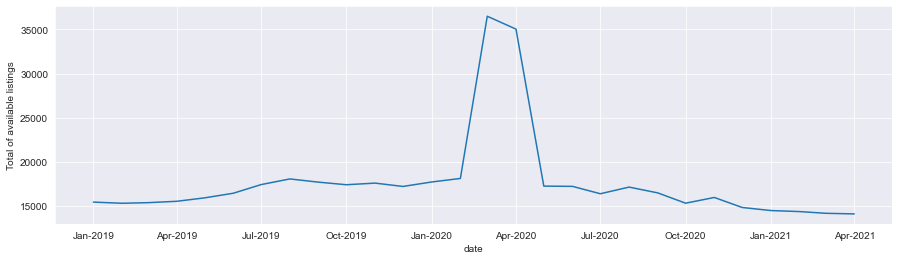

In [15]:
g, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(x='date', y='id', data=df, ax=ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.set_ylabel('Total of available listings')
plt.show()

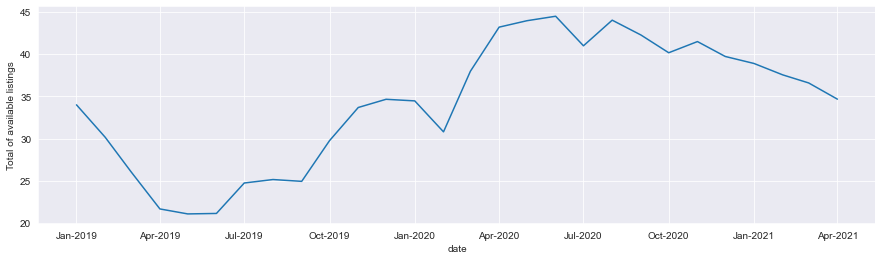

In [16]:
g, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(x='date', y='availability_60', data=df, ax=ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.set_ylabel('Total of available listings')
plt.show()

In [17]:
df = listings[['id', 'availability_60', 'year', 'month']].groupby(
    ['id'], as_index=False).count()

In [18]:
df[df.month == 28]

id  availability_60  year  month
4         23197               28    28     28
36        71736               28    28     28
62       110041               28    28     28
63       110098               28    28     28
106      188267               28    28     28
...         ...              ...   ...    ...
21599  32808261               28    28     28
21607  32812628               28    28     28
21639  32833722               28    28     28
21656  32842455               28    28     28
21698  32883433               28    28     28

[994 rows x 4 columns]

In [19]:
df.id

0           18666
1           18674
2           21605
3           21974
4           23197
           ...   
41796    49155035
41797    49155115
41798    49155172
41799    49155456
41800    49158347
Name: id, Length: 41801, dtype: int64

### Location of the listings in Barcelona (by latitude and longitude)

In [20]:
#pip install folium


In [21]:
listings_2104 = pd.read_csv(data_dir + 'listings_2104.csv.gz')
listings_2104.shape
listings_2104.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [22]:
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap, MarkerCluster

In [23]:
import numpy as np
import math

In [24]:
# Create the map
map_1 = folium.Map(location=[41.3879,2.16992], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in listings_2104.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(folium.Marker([row['latitude'], row['longitude']]))
map_1.add_child(mc)

# Display the map
display(map_1)

# We can see the number of listings by location. There are more listings at the city center and less in the outlying neighbourhoods

### Average availability of the listings per neighbourhood

In [59]:
# We use the final agreggated dataset

listings = pd.read_csv(data_dir + 'listings_transformed.csv.gz')

In [29]:
# Availability_60 average of each neighbourhood group

pt1 = pd.pivot_table(listings,index='neighbourhood_group_cleansed',values='availability_60',aggfunc='sum')
pt2 = pd.pivot_table(listings,index='neighbourhood_group_cleansed',values='availability_60',aggfunc='count')
pt3 = pt1/pt2
pt3 = pd.DataFrame(pt3)
pt3

availability_60
neighbourhood_group_cleansed                 
Ciutat Vella                        34.414038
Eixample                            34.103260
Gràcia                              33.326888
Horta-Guinardó                      35.915815
Les Corts                           35.527089
Nou Barris                          40.822970
Sant Andreu                         36.671873
Sant Martí                          34.987199
Sants-Montjuïc                      35.440737
Sarrià-Sant Gervasi                 35.633727

In [30]:
# Upload geojson (neighbourhood areas in Barcelona)

import geopandas as gpd
gpd.datasets.available
['naturalearth_cities', 'naturalearth_lowres', 'nybb']
import json
data = gpd.read_file(data_dir + 'districtes.geojson', encoding = 'utf-8')
data['neighbourhood_group_cleansed']=data['NOM']
data


ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT  CONJ_DESCR  \
0       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
1       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
2       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
3       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
4       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
5       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
6       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
7       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
8       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
9       01   Grup - I    0104  Unitats Administratives     010412  Districtes   

  ID_SUBCONJ SCONJ_DESC  ID_ELEMENT          ELEM_DESCR     NIVELL  \
0   01041201  Districte  0104120101  Límit de districte  ADM_02_PL   
1   01041201  Districte  0104120101  Límit de districte  ADM_02_PL   
2   01041201  Districte  0104120101  Límit de districte  ADM_02_PL   
3   01041201  Districte  0104120101  Límit de districte  ADM_02_PL   
4   01041201  Districte  0104120101  Límit de districte  ADM_02_PL   
5   01041201  Districte  0104120101  Límit de districte  ADM_02_PL   
6   01041201  Districte  0104120101  Límit de districte  ADM_02_PL   
7   01041201  Districte  0104120101  Límit de districte  ADM_02_PL   
8   01041201  Districte  0104120101  Límit de districte  ADM_02_PL   
9   01041201  Districte  0104120101  Límit de districte  ADM_02_PL   

                      NDESCR_CA                      NDESCR_ES  \
0  Límit de districte (polígon)  Límite de distrito (polígono)   
1  Límit de districte (polígon)  Límite de distrito (polígono)   
2  Límit de districte (polígon)  Límite de distrito (polígono)   
3  Límit de districte (polígon)  Límite de distrito (polígono)   
4  Límit de districte (polígon)  Límite de distrito (polígono)   
5  Límit de districte (polígon)  Límite de distrito (polígono)   
6  Límit de districte (polígon)  Límite de distrito (polígono)   
7  Límit de districte (polígon)  Límite de distrito (polígono)   
8  Límit de districte (polígon)  Límite de distrito (polígono)   
9  Límit de districte (polígon)  Límite de distrito (polígono)   

                     NDESCR_EN   TERME DISTRICTE BARRI AEB SEC_CENS GRANBARRI  \
0  District boundary (polygon)  080193        01     -   -        -         -   
1  District boundary (polygon)  080193        02     -   -        -         -   
2  District boundary (polygon)  080193        03     -   -        -         -   
3  District boundary (polygon)  080193        04     -   -        -         -   
4  District boundary (polygon)  080193        05     -   -        -         -   
5  District boundary (polygon)  080193        06     -   -        -         -   
6  District boundary (polygon)  080193        07     -   -        -         -   
7  District boundary (polygon)  080193        08     -   -        -         -   
8  District boundary (polygon)  080193        09     -   -        -         -   
9  District boundary (polygon)  080193        10     -   -        -         -   

  ZUA AREA_I LITERAL  PERIMETRE          AREA  ORD_REPRES CODI_UA   TIPUS_UA  \
0   -      -      01  21366.962  4.204931e+06           5      01  DISTRICTE   
1   -      -      02  13931.644  7.464303e+06           5      02  DISTRICTE   
2   -      -      03  46711.857  2.287985e+07           5      03  DISTRICTE   
3   -      -      04  12551.602  6.010769e+06           5      04  DISTRICTE   
4   -      -      05  35757.403  1.991557e+07           5      05  DISTRICTE   
5   -      -      06  12482.174  4.224278e+06           5      06  DISTRICTE   
6   -      -      07  20607.189  1.191963e+07           5      07  DISTRICTE   
7   -      -      08  14707.881  8.056468e+06           5      08  DISTRICTE   


In [31]:
# Merge availability_60 average with geojson

data=pd.merge(data, pt3, on='neighbourhood_group_cleansed', how='outer')

print(type(data))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [23]:
conda install geoplot -c conda-forge

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
#pip install cartopy


     |████████████████████████████████| 12.1 MB 4.4 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp38-cp38-macosx_10_9_x86_64.whl size=11859569 sha256=c555d45198347dd17f321710de5adbeafc658ea196a19769e86da88c1ec5ed08
  Stored in directory: /Users/sarapereira/Library/Caches/pip/wheels/d7/7e/a7/f1de106b1da02e78db1fc6ff482fda367f8902856faa85d1c6
Successfully built cartopy
Note: you may need to restart the kernel to use updated packages.


In [32]:
import geoplot
import geoplot.crs as gcrs

<AxesSubplot:>

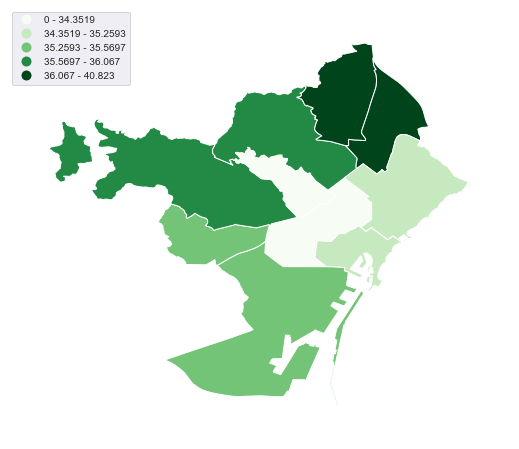

In [34]:
# Draw the availability_60 average of every nerighbourhood group. The value of each range has been defined with quantiles. 
# As a result, the center has less availability_60 in average
 
availability_60=data['availability_60']
import mapclassify
scheme = mapclassify.Quantiles(availability_60, k=5)

geoplot.choropleth(
    data, hue=availability_60, scheme=scheme,
    cmap='Greens', figsize=(12, 8), legend=True
)